# Bike Rental Prediction

In [1]:
#First, let's import the nesseacary labraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [45]:
df=pd.read_csv("Bike Rental UCI dataset.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

the data frame has a shape : (17379, 13)
let's print the first five rows 
    season  yr  mnth  hr  holiday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0           0           1  0.24  0.81   
1       1   0     1   1        0           0           1  0.22  0.80   
2       1   0     1   2        0           0           1  0.22  0.80   
3       1   0     1   3        0           0           1  0.24  0.75   
4       1   0     1   4        0           0           1  0.24  0.75   

   windspeed dayOfWeek  days  demand  
0        0.0       Sat     0      16  
1        0.0       Sat     0      40  
2        0.0       Sat     0      32  
3        0.0       Sat     0      13  
4        0.0       Sat     0       1  


In [3]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
dayOfWeek     17379 non-null object
days          17379 non-null int64
demand        17379 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB
None
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.00000

Looks like the dataframe has 17379 rows and 13 columns. There is one columns of type object (text) <br>
temp, hum, windspeed are rescaled to 0-1 range

## 2. Visualize the data

'Done'

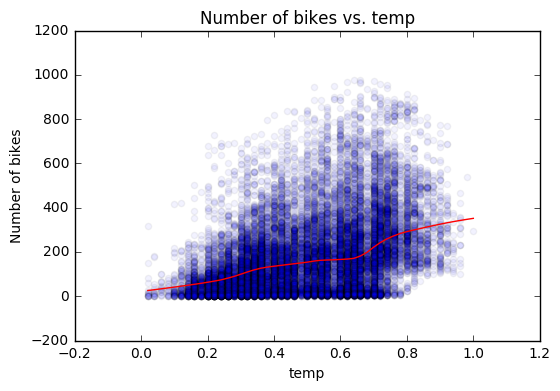

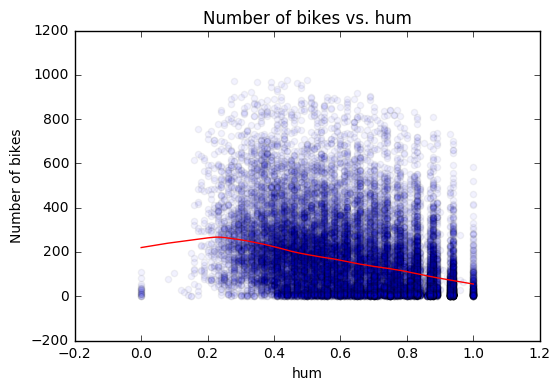

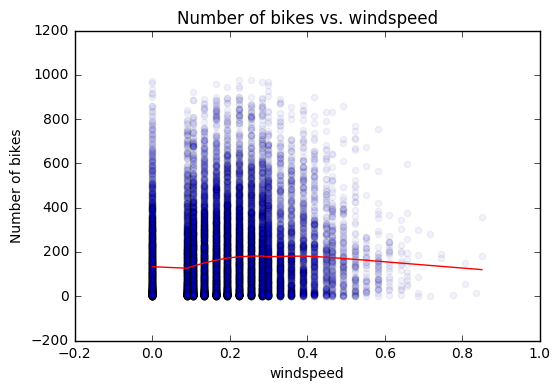

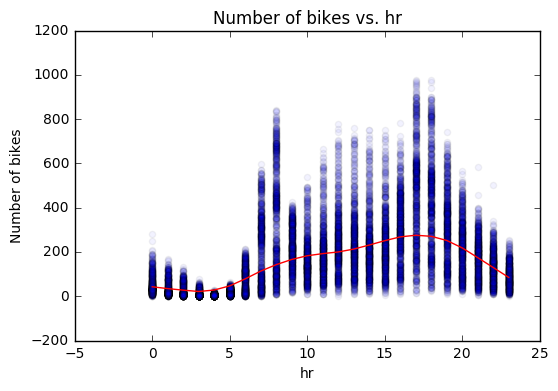

In [5]:
# make sure that the visualizations are printed in the notebook
%matplotlib inline   

def bike_scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    ## Loop over the columns and create the scatter plots
    for col in cols:
        ## first compute a lowess fit to the data
        los = lw.lowess(df['demand'], df[col], frac = 0.3)
    
        ## Now make the plots
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.plot(kind = 'scatter', x = col, y = 'demand', ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'

num_cols = ["temp", "hum", "windspeed", "hr"] 
bike_scatter(df, num_cols)

'Done'

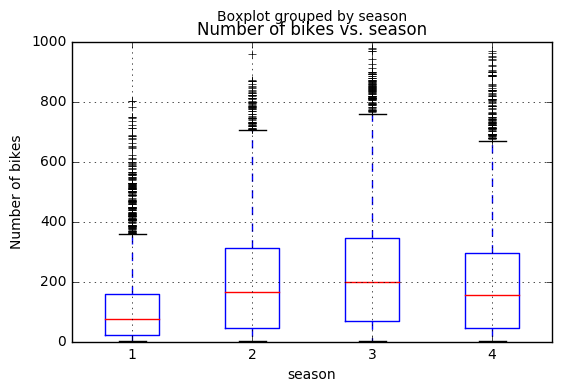

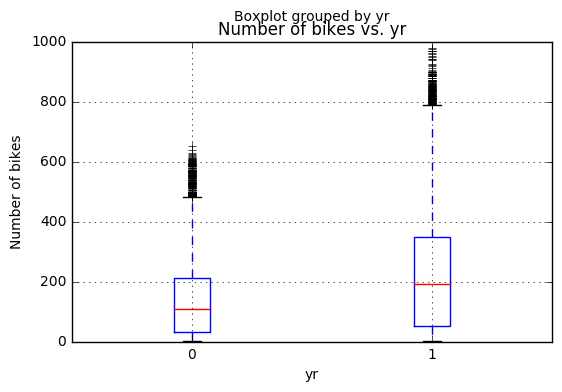

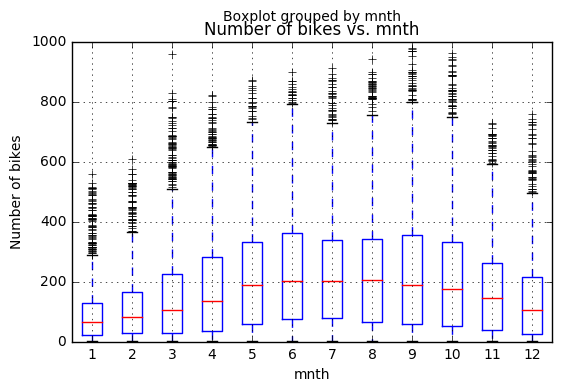

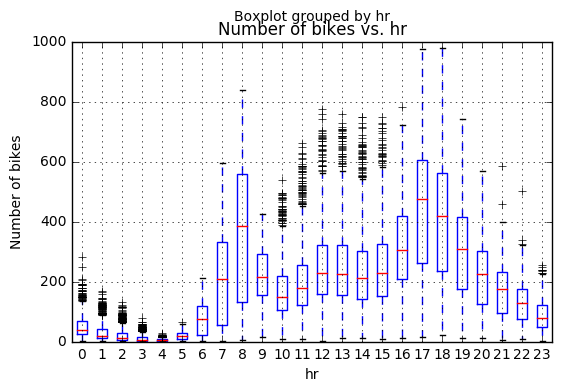

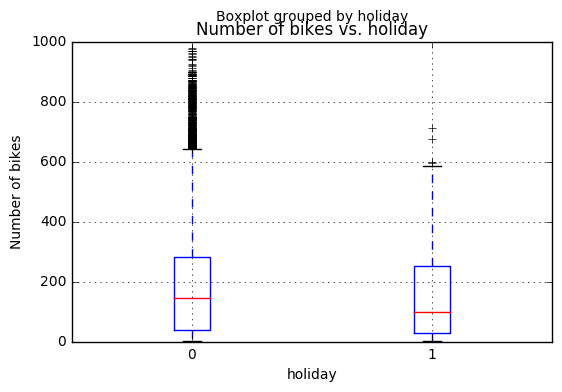

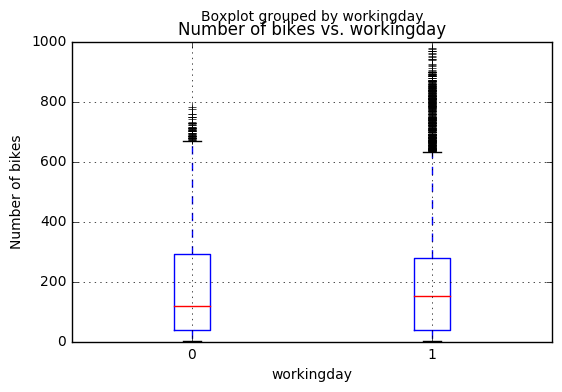

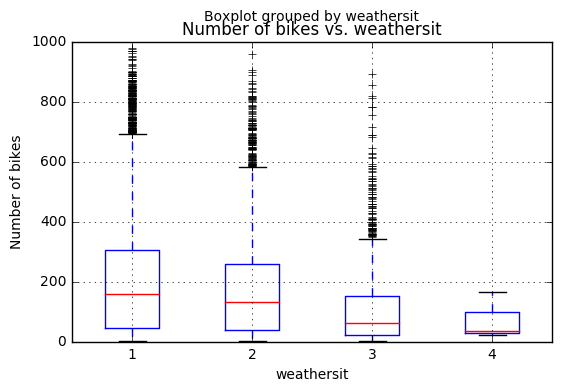

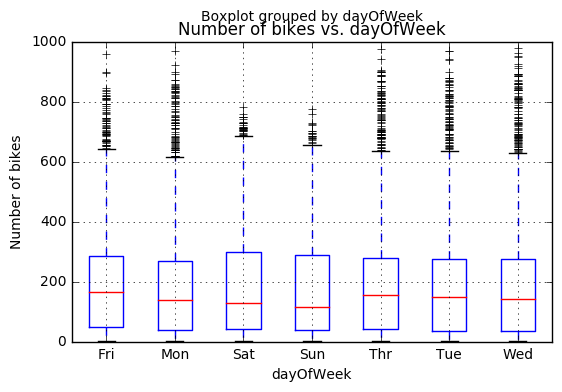

In [6]:
def bike_box(df, cols):
    import matplotlib.pyplot as plt
    
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = 'demand', by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday','workingday', 'weathersit', 'dayOfWeek']
bike_box(df, cat_cols)

'Done'

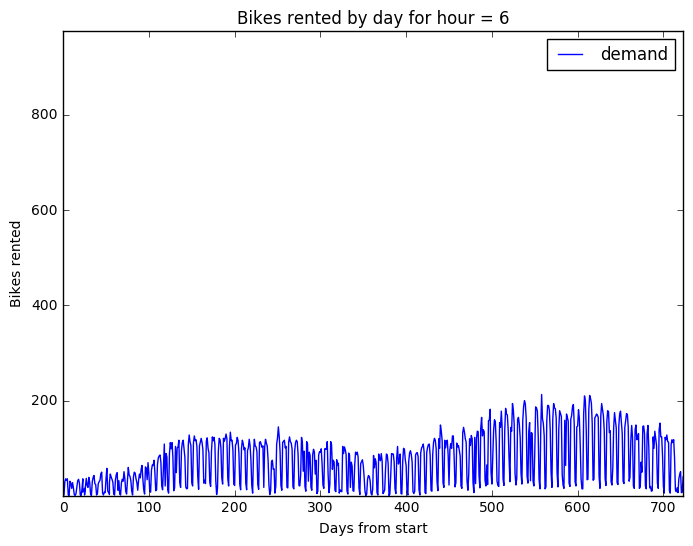

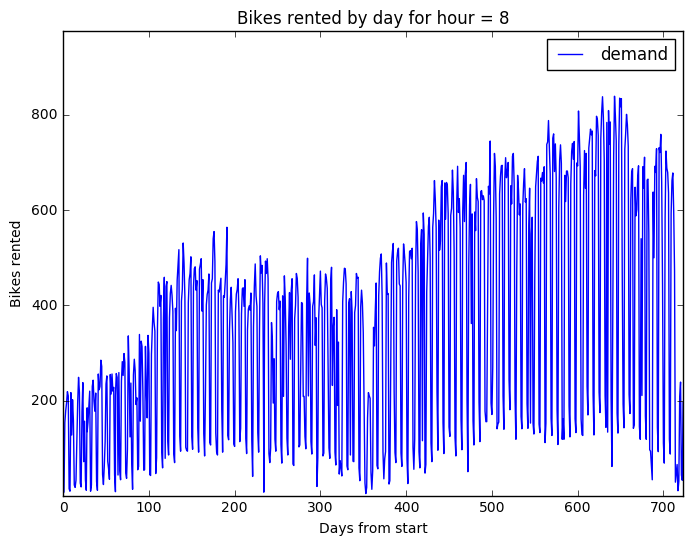

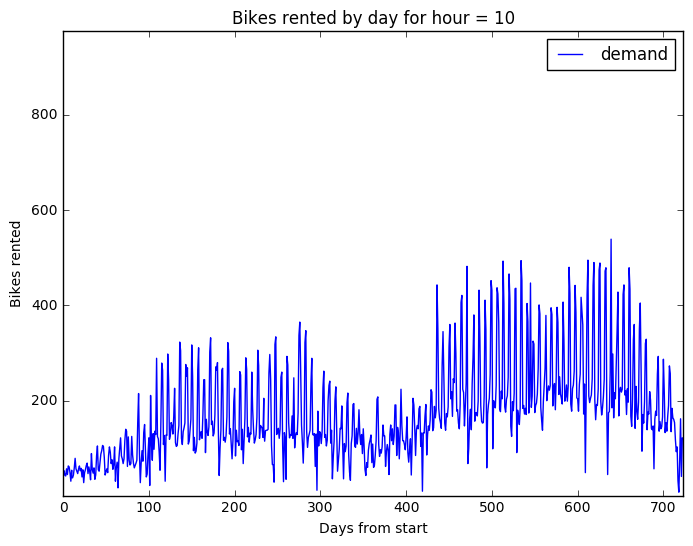

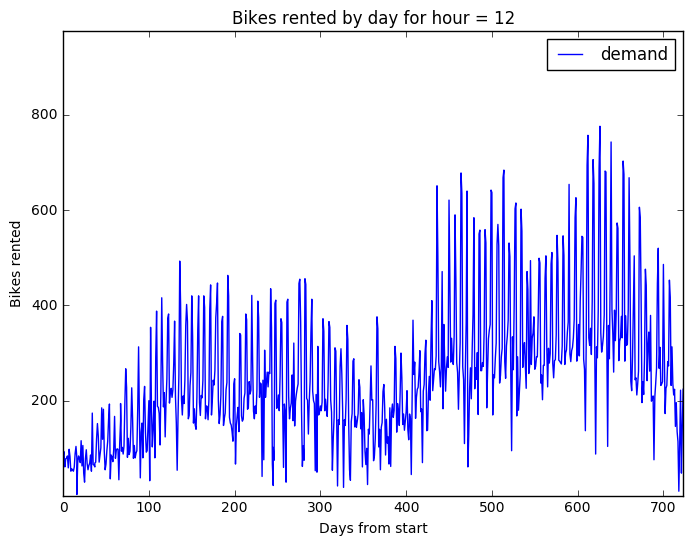

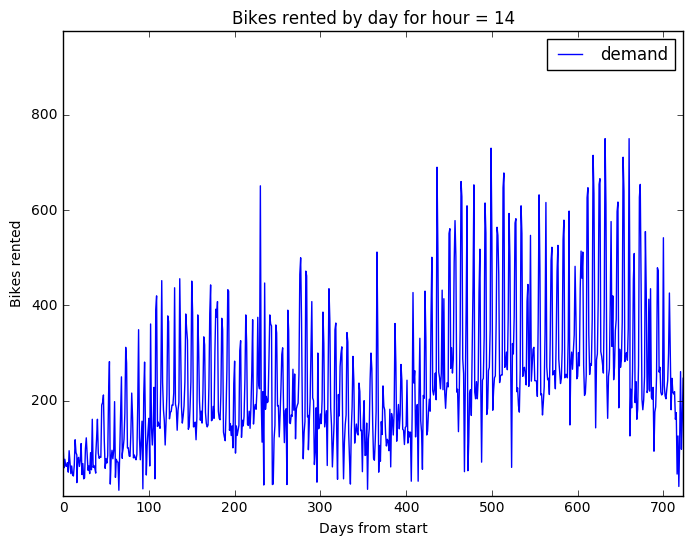

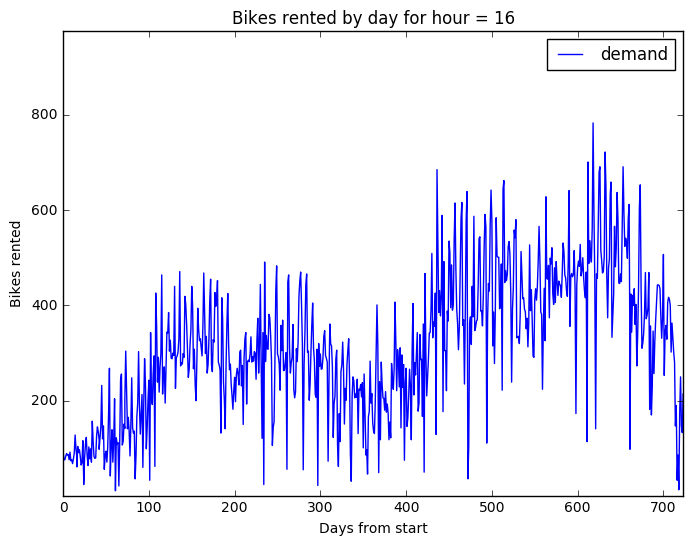

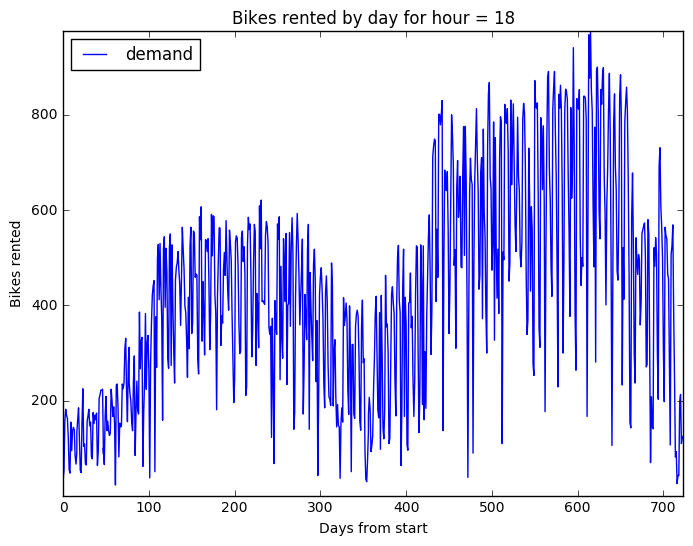

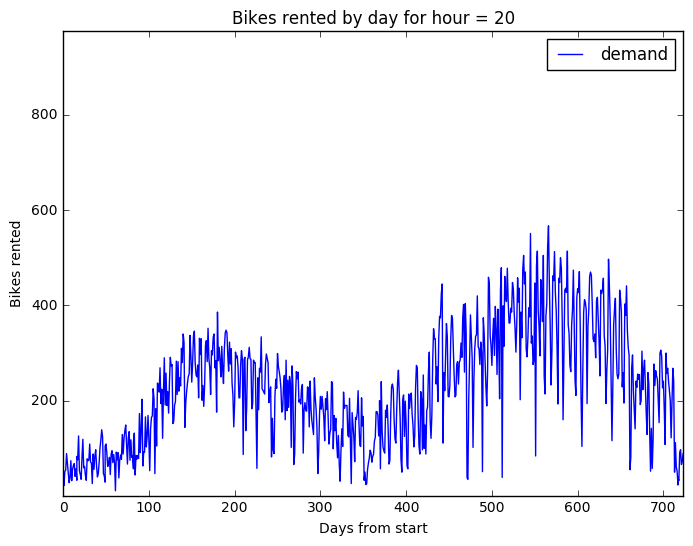

In [8]:
def bike_series(df, tms):
    import matplotlib.pyplot as plt
        
    lims = (min(df.demand), max(df.demand))   
    for t in tms:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == t].plot(kind = 'line', x = 'days', y = 'demand',
                            ylim = lims, ax = ax)    
        plt.xlabel("Days from start")
        plt.ylabel("Bikes rented")
        plt.title("Bikes rented by day for hour = " + str(t))
    return 'Done'
plt_times = [6, 8, 10, 12, 14, 16, 18, 20]
bike_series(df, plt_times)

'Done'

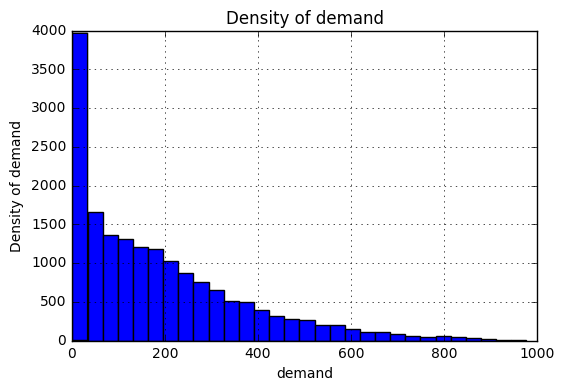

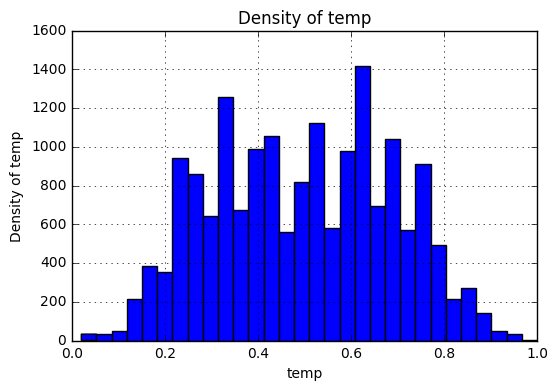

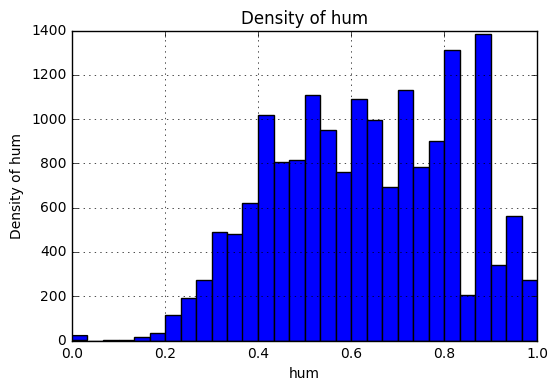

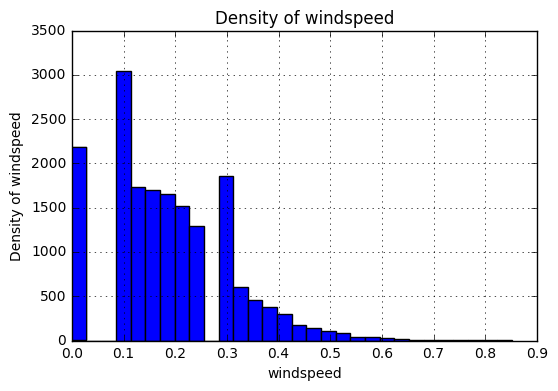

In [9]:
def bike_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'
hist_cols = ["demand", "temp", "hum", "windspeed"]
bike_hist(df, hist_cols)

## 3. Building the Model

In [64]:
y = df.demand# complete with the demand column
X = df.drop('demand',axis=1, inplace=False)# the rest of the columns

X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print ('training test : ', X_train.shape,y_train.shape) #you code)
print ('testing test : ', X_test.shape,y_test.shape) #you code)

training test :  (12165, 12) (12165,)
testing test :  (5214, 12) (5214,)


In [105]:
from sklearn.linear_model import LinearRegression
# import LinearRegression : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)# your code
print  ('train score =' ,  train_score)#your code)
print  ('test score = ', test_score) #your code)

train score = 0.392879469373
test score =  0.374626457119


Looks like the model is not fitting well the data, since R2 is small. 
There is also no sign of overfitting since there is not much difference between training and test r-square. Let's now print the model's parameters

In [78]:
print  ('Coeffecients = ', reg.coef_) # your code )
print ('Intecept = ', reg.intercept_)# your code )

Coeffecients =  [  2.05176442e+01   1.23100992e+02   3.33459186e+00   7.79154593e+00
  -2.54692114e+01   3.72032609e+00  -3.18615006e+00   2.86834855e+02
  -1.98523440e+02   2.08639972e+01   4.16448983e-02  -1.19330558e-01]
Intecept =  -11.9106097052


Let's print some other metrics

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)# your code here
r2 = r2_score(y_test,y_pred)# your code here
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

mse = 20893.189110009193, rmse = 144.54476507300149 
mae = 108.14475356762338 r2 = 0.37462645711888976


## 4. Visualize the model's performance

'Done'

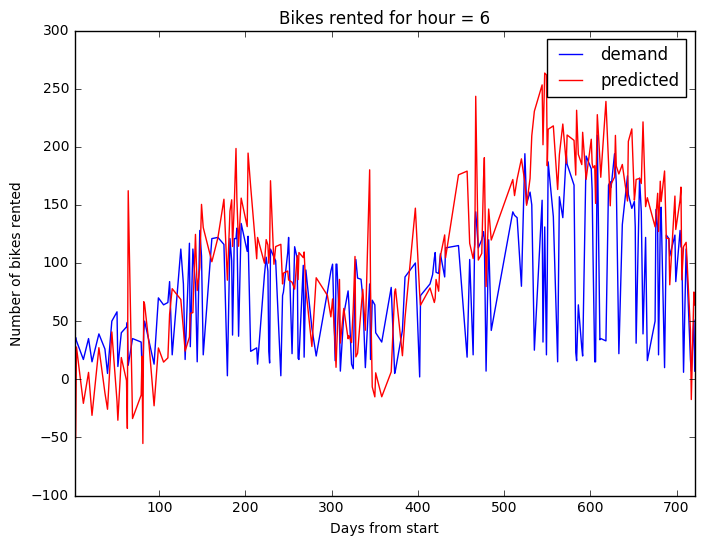

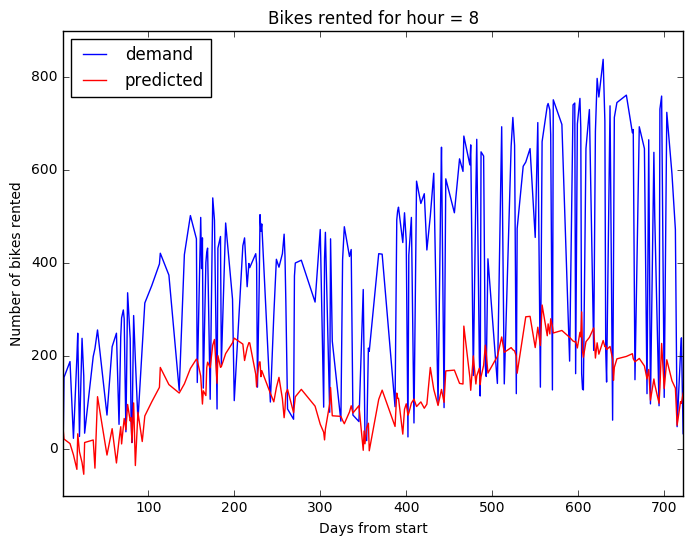

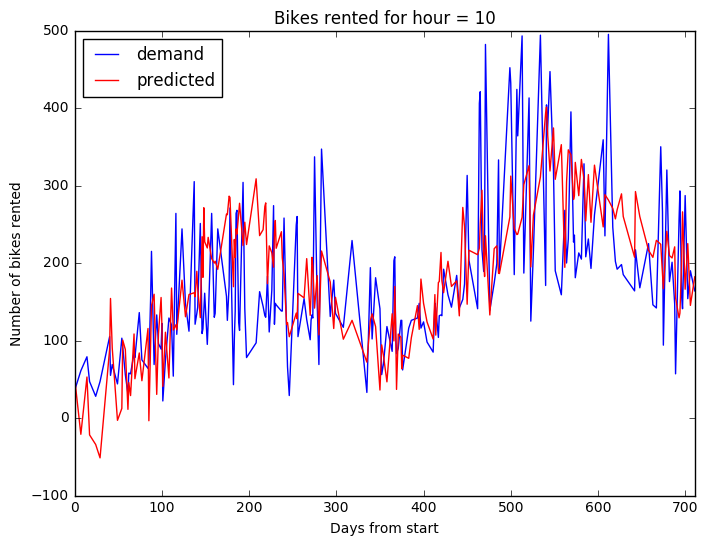

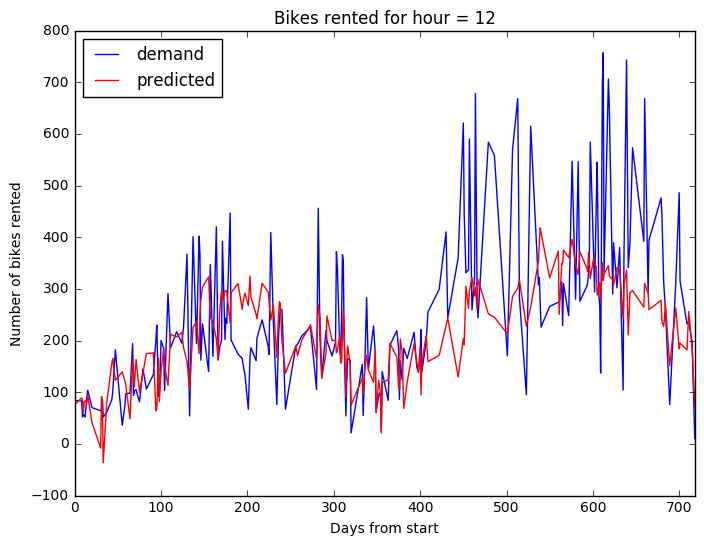

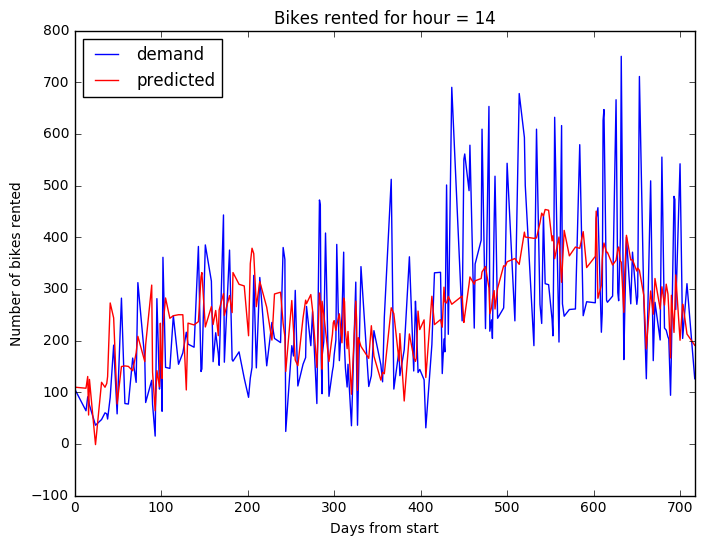

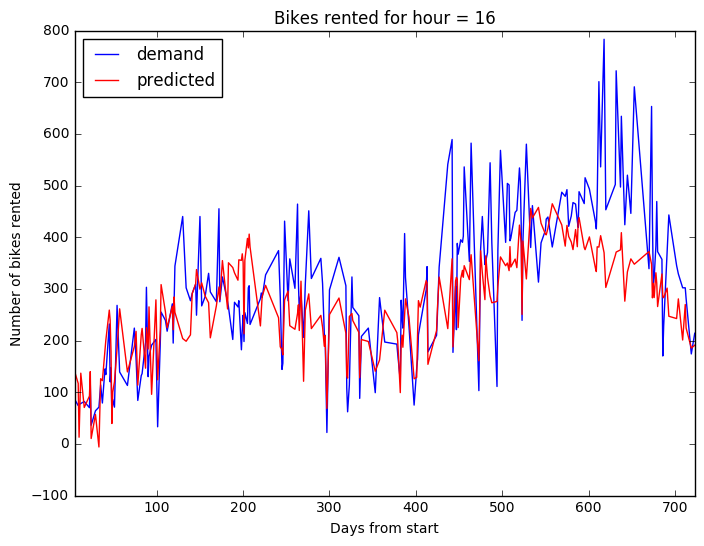

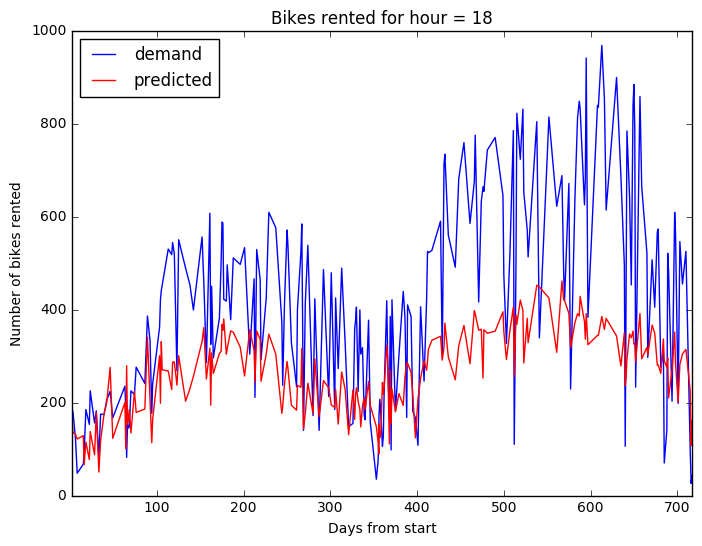

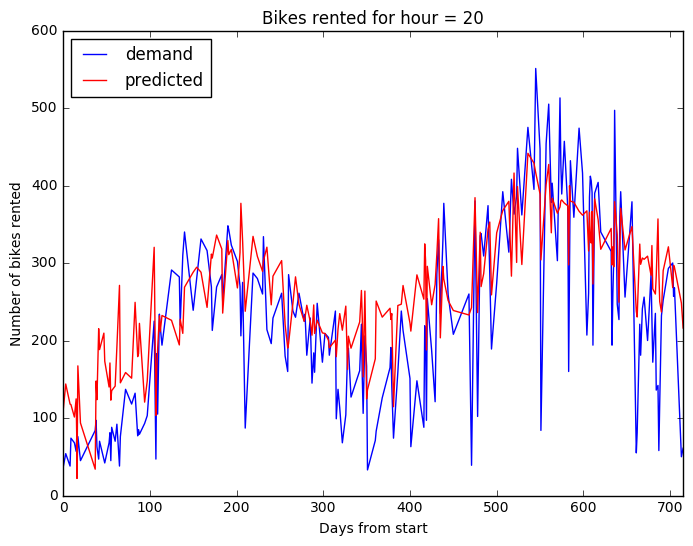

In [106]:
def ts_bikes(df, times):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    for tm in times:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'demand', ax = ax)          
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'predicted', color = 'red', ax = ax)                                    
        plt.xlabel("Days from start")
        plt.ylabel("Number of bikes rented")
        plt.title("Bikes rented for hour = " + str(tm))
        #fig.savefig('ts_' + str(tm) + '.png')
    return 'Done'

X_test['predicted']=y_pred
X_test['demand']=y_test
X_test.sort('days',inplace=True)
ts_bikes(X_test, plt_times)

Looks like the model is not doing a great job in fitting the demand for hours 8 and 18. Let's plot the reisuals for all hours

'Done'

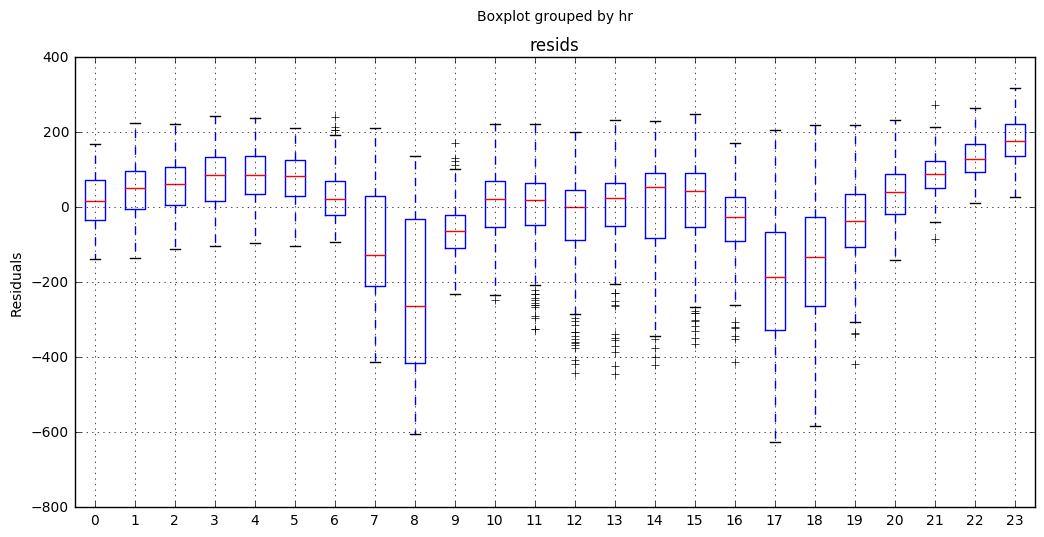

In [85]:
def resids(df):
    df['resids'] = df.predicted - df.demand
    return df        
        
def box_resids(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    
    df = resids(df)
    
    fig = plt.figure(figsize=(12, 6))
    fig.clf()
    ax = fig.gca()  
    df.boxplot(column = ['resids'], by = ['hr'], ax = ax)   
    plt.xlabel('')
    plt.ylabel('Residuals')
    fig.savefig('boxes' + '.png')
    return 'Done'
box_resids(X_test)

for hours 7,8, 17, 18 most of the residuals are negative, so our model is under-predecting the demand

Plot the histogram of residuals. A good model has residuals centered around zero

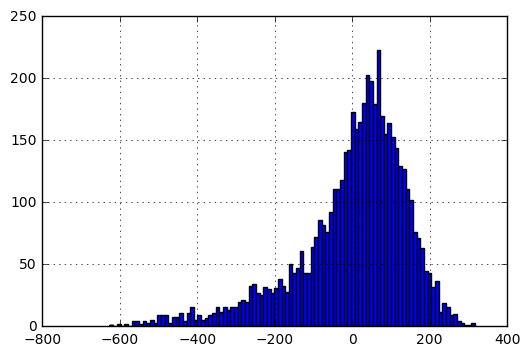

In [86]:
resids(X_test)['resids'].hist(bins=100)

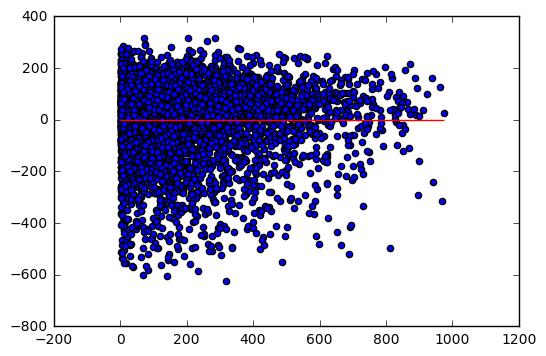

In [87]:
import matplotlib.pyplot as plt
plt.scatter(y_test, resids(X_test)['resids'])
plt.hlines(y=0, xmin=0,xmax=y_test.max(), color='r')
plt.show()

As we've seen before, there is no sign of overfitting, so regularization might not help improving the model's performance. But let's try Ridge and Lasso to confirm that

In [103]:
# Split the data again into X_train, X_test, y_train, y_test 
y = df.demand# complete with the demand column
X = df.drop('demand',axis=1, inplace=False)# the rest of the columns
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Import Ridge : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
from sklearn.linear_model import Ridge

# import Lasso : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
from sklearn.linear_model import Lasso

# try different values for alpha = [0.001, 0.01, 0.1, 1, 10, 100,1000,1000]
reg = Ridge(alpha = 1000)
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)



print  ('train score =', train_score )
print  ('test score = ', test_score) 
print  ('Coeffecients = ',reg.coef_)

train score = 0.331302394877
test score =  0.320167215215
Coeffecients =  [ 28.62293911   1.94075554  -8.44271988   9.64556976  -6.78472792
   6.4435485  -22.63253306  84.15327318 -53.5313783   11.58609255
   0.21349406   0.23228669]


As you can see, Regularization is not bringing improvment to the model. The performance is decreasing with large values of alpha. The main difference is that with Lasso, parameters are shrinked to zero

Another way of improving the model is by adding extra features (complexity). As we've seen before, the model has poor performance for some hours. Let's add Boolean features indicating the model each hour. These are also called dummy variables.

In [107]:
for hour in df.hr.unique():
    col='is_'+str(hour)
    df[col]=df.hr==hour

print (df.columns)
print (df.head())

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'dayOfWeek', 'days', 'demand', 'is_0',
       'is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9',
       'is_10', 'is_11', 'is_12', 'is_13', 'is_14', 'is_15', 'is_16', 'is_17',
       'is_18', 'is_19', 'is_20', 'is_21', 'is_22', 'is_23'],
      dtype='object')
   season  yr  mnth  hr  holiday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0           0           1  0.24  0.81   
1       1   0     1   1        0           0           1  0.22  0.80   
2       1   0     1   2        0           0           1  0.22  0.80   
3       1   0     1   3        0           0           1  0.24  0.75   
4       1   0     1   4        0           0           1  0.24  0.75   

   windspeed  ...    is_14  is_15  is_16  is_17  is_18  is_19  is_20  is_21  \
0        0.0  ...    False  False  False  False  False  False  False  False   
1        0.0  ...

Re-train your model

In [115]:
# Split the data again into X_train, X_test, y_train, y_test 
y = df.demand# complete with the demand column
X = df.drop('demand',axis=1, inplace=False)# the rest of the columns
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)



print  ('train score =', train_score )
print  ('test score = ', test_score) 

train score = 0.675975513443
test score =  0.670532556748


'Done'

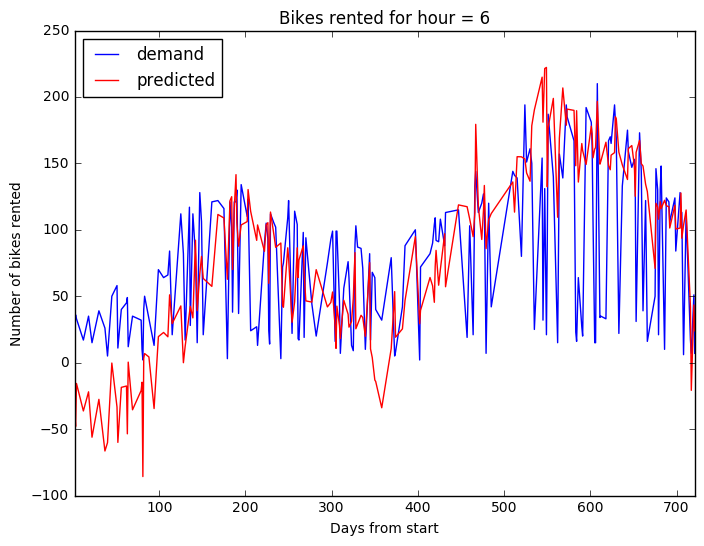

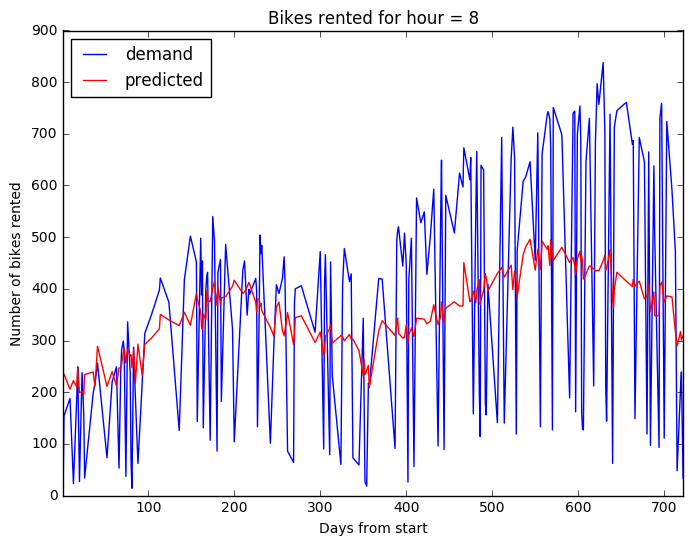

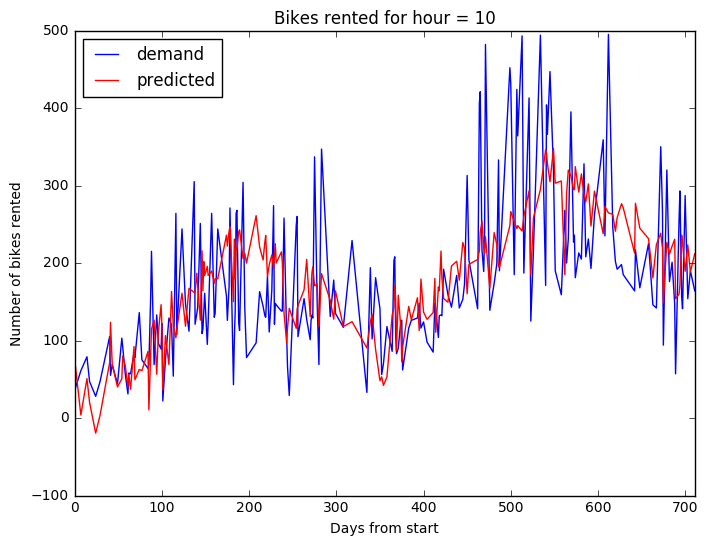

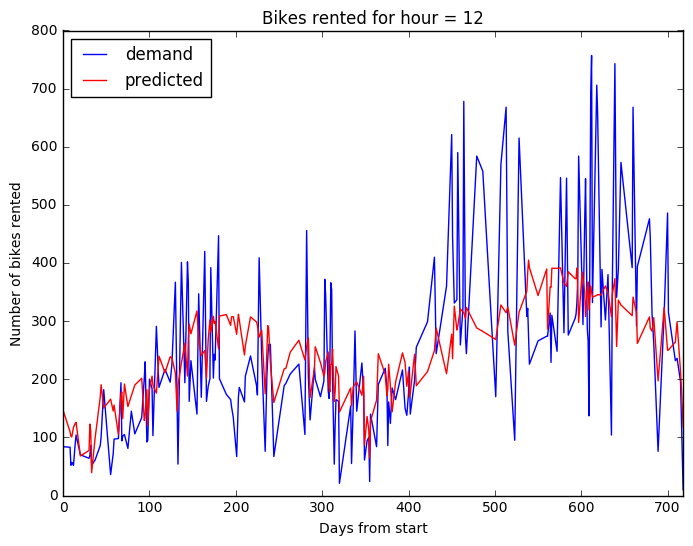

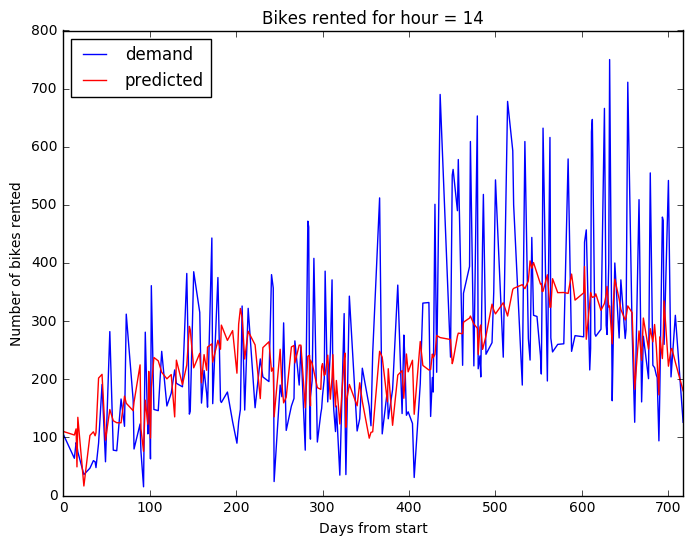

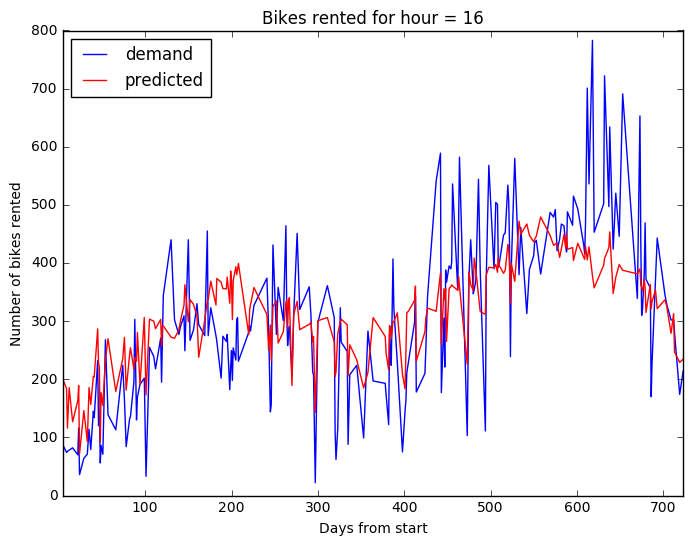

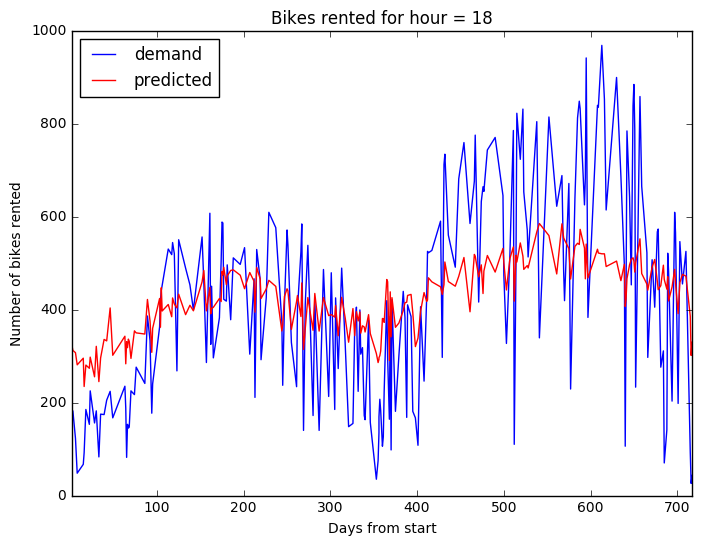

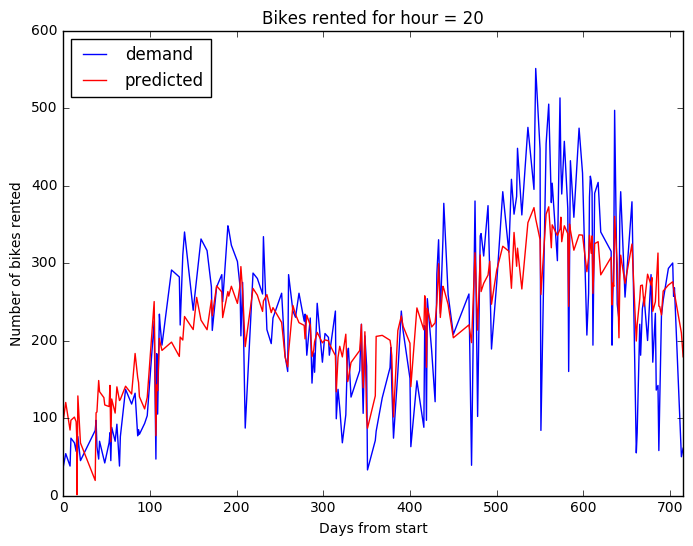

In [116]:
y_pred = reg.predict(X_test)  # predict the demand for X_test
X_test['predicted']=y_pred
X_test['demand']=y_test
X_test.sort('days',inplace=True)
ts_bikes(X_test, plt_times)

Visualize the residuals

import matplotlib.pyplot as plt
plt.scatter(y_test, resids(X_test)['resids'])
plt.hlines(y=0, xmin=0,xmax=y_test.max(), color='r')
plt.show()